In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pasos
- Cargar datos 
- Normalizar datos 
- Agregar una columna de unos
- Calcular la prediccion (theta tanspuesta por X vector) 
- Calcular el costo (error)
- Dos formas para calcular los parámetros (thetas)
    - Ecuacion normal (X entrenaminto * producto matricil-< inversa - Xt entrenamiento Y(años que vivere))
    - Gradiente Descendiente 

In [172]:
def load_data(filename):
    return pd.read_csv(filename, delim_whitespace=True)

In [173]:
def normalization(data):
    mean_ = data.mean(axis=0) 
    std_ = data.std(axis=0) #estandar
    return (data - mean_)/std_

In [174]:
def train_test(data,col):
    X_train = data[:int((70*len(data))/100), :col]
    y_train = data[:int((70*len(data))/100), col]
    X_test = data[int((70*len(data))/100):, :col]
    y_test = data[int((70*len(data))/100):, col]
    return X_train, y_train, X_test, y_test

In [175]:
# Add a column of ones (bias)
def add_ones(X_train, y_train, X_test, y_test):
    n_exa_train = len(y_train)
    n_exa_test = len(y_test)

    X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
    X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)
    
    return X_train, X_test

In [176]:
def prediction(theta, X):
    return np.dot(X, theta)

In [177]:
def calculate_cost(X, y, theta):
    #J(theta) = 1/2m sum(h(x) - y)^2
    m = X.shape[0] #nbr of training data 
    pred = prediction(theta, X)
    c = (1/(2*m)) * np.sum(np.square(pred - y))
    return c

In [178]:
def gradient_descent(X, y, theta, nro_iter, learning_rate): 
    m = X.shape[0] #nbr of training data
    #cost_history = np.empty(nro_iter, dtype=float) 
    cost_history = np.zeros(nro_iter) 
    #h = calculate_cost(X, y, theta)
    for i in range(nro_iter):
        pred = prediction(theta, X)
        pred = pred - y        
        theta = theta - (learning_rate * (np.dot(X.T,pred)/m))
        cost_history[i] = calculate_cost( X, y, theta) 
    return theta, cost_history

In [179]:
def normal_equation(X, y):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    #theta = np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y))
    return theta

#### EXPERIMENTO I

In [180]:
def NE_find_parameters():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    theta = normal_equation(X_train, y_train)
    print("Weight Normal Equation: ", theta)
    cost = calculate_cost(X_train, y_train, theta)
    print("Cost: ", cost)

NE_find_parameters()

Weight Normal Equation:  [-0.08660972 -0.09203601 -0.36687041  0.1072892   0.64775736]
Cost:  0.1033688822072403


In [181]:
def GD_find_parameters():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    #theta = np.random.rand(n_features)

    epochs = [500,800,1100,14000,1700,2000,2300,2600,2900,3200]  
    learn_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    result_train = np.empty([len(learn_rates),len(epochs)])
    result_test = np.empty([len(learn_rates),len(epochs)])
    for epoch in epochs:
        for learn_rate in learn_rates:
            theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
            error_train = calculate_cost(X_train, y_train, theta_gd)
            error_test = calculate_cost(X_test, y_test, theta_gd)
            
            result_train = error_train
            result_test = error_test
    pdObj = pd.DataFrame(result_train, index = learn_rates, columns = epochs) 
    pdObj1 = pd.DataFrame(result_test, index = learn_rates, columns = epochs) 
    return pdObj
GD_find_parameters()

,500,800,1100,14000,1700,2000,2300,2600,2900,3200
0.05,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.10,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.20,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.30,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.40,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369
0.50,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369,0.103369


Weights of gradient_descent - training data:  [ 0.07638048  0.0825062  -0.18761645  0.20078992  0.46138006] 

Weights of gradient_descent - testing data:  [0.50097598 0.04447758 0.02764248 0.07321095 0.42925218] 



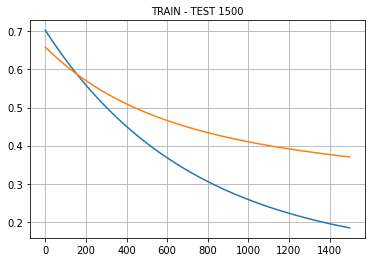

Weights of gradient_descent - training data:  [ 0.04063732  0.05534583 -0.21578978  0.19743403  0.49354592] 

Weights of gradient_descent - testing data:  [0.49132476 0.01001336 0.01726028 0.05193229 0.45384285] 



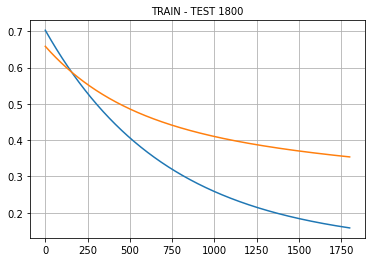

Weights of gradient_descent - training data:  [-0.09214472 -0.07665687 -0.3671231   0.12070371  0.65088371] 

Weights of gradient_descent - testing data:  [ 0.0752221  -0.42064842 -0.23195448 -0.24234488  0.63074757] 



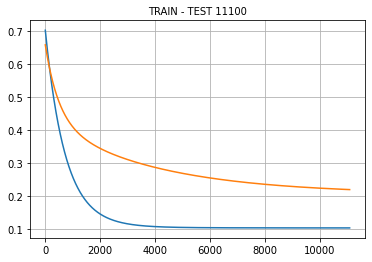

Weights of gradient_descent - training data:  [-0.08660972 -0.09203601 -0.36687041  0.1072892   0.64775736] 

Weights of gradient_descent - testing data:  [-0.14347607 -0.59829772 -0.36155602 -0.34934339  0.69622957] 



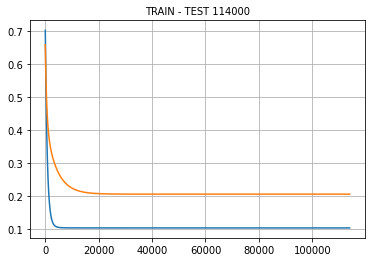

Weights of gradient_descent - training data:  [-0.0916161  -0.07795507 -0.36733083  0.11945089  0.65091078] 

Weights of gradient_descent - testing data:  [ 0.05963864 -0.43367635 -0.24093244 -0.25033646  0.63505659] 



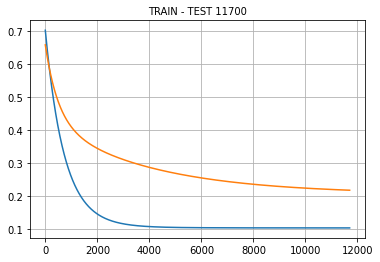

Weights of gradient_descent - training data:  [-0.0913675  -0.07856173 -0.36740545  0.11887784  0.65089783] 

Weights of gradient_descent - testing data:  [ 0.05226612 -0.43982369 -0.24518973 -0.25409912  0.6371084 ] 



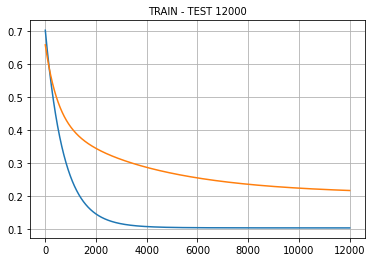

Weights of gradient_descent - training data:  [-0.09112978 -0.07914195 -0.36746443  0.1183367   0.65087106] 

Weights of gradient_descent - testing data:  [ 0.04515995 -0.44573901 -0.24929945 -0.25771503  0.6390946 ] 



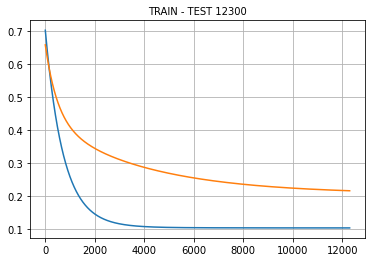

Weights of gradient_descent - training data:  [-0.090903   -0.079697   -0.36751017  0.11782506  0.65083284] 

Weights of gradient_descent - testing data:  [ 0.03831067 -0.45143119 -0.25326658 -0.26119029  0.64101722] 



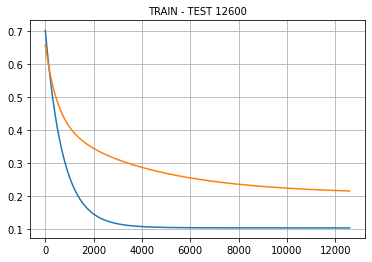

Weights of gradient_descent - training data:  [-0.09068705 -0.08022803 -0.36754468  0.11734077  0.65078523] 

Weights of gradient_descent - testing data:  [ 0.03170913 -0.45690874 -0.25709593 -0.26453066  0.64287819] 



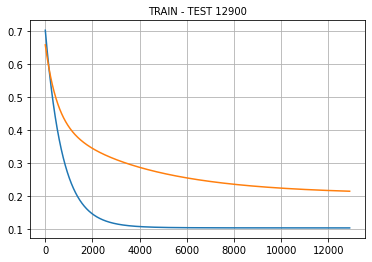

Weights of gradient_descent - training data:  [-0.09048174 -0.08073614 -0.36756972  0.1168819   0.65072995] 

Weights of gradient_descent - testing data:  [ 0.0253465  -0.46217985 -0.26079214 -0.26774166  0.64467939] 



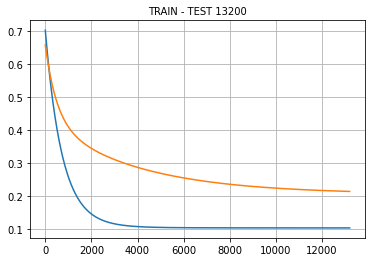

In [182]:
def GD_ploteo():
    fdata = load_data('petrol_consumption.csv')
    data = normalization(fdata)
    data = data.values
    X_train, y_train, X_test, y_test = train_test(data,data.shape[1]-1)
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    #theta = np.zeros(n_features)
    theta = np.random.rand(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rate = 0.0005

    for epoch in epochs:
        theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
        theta_gd1, cost_history1 = gradient_descent(X_test, y_test, theta, epoch, learn_rate)
        error_train = calculate_cost(X_train, y_train, theta_gd)
        error_test = calculate_cost(X_test, y_test, theta_gd)
        
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.plot(range(len(cost_history1)), cost_history1)
        plt.title('TRAIN - TEST '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - training data: ", theta_gd, "\n")
        print("Weights of gradient_descent - testing data: ", theta_gd1, "\n")
        ax.grid(True)
        plt.show()
GD_ploteo()

In [183]:
def HNE_find_parameters():
    fdata = pd.read_csv('Housing.csv')
    fdata = fdata.replace(to_replace='yes',value=1,regex=True)
    fdata = fdata.replace(to_replace='no',value=0,regex=True)

    data = normalization(fdata)
    data = data.values

    X_train = data[:int((70*len(data))/100), 1:]
    y_train = data[:int((70*len(data))/100), 0]
    X_test = data[int((70*len(data))/100):, 1:]
    y_test = data[int((70*len(data))/100):, 0]

    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    theta = normal_equation(X_train, y_train)
    print("Weight Normal Equation: ", theta)
    cost = calculate_cost(X_train, y_train, theta)
    print("Cost: ", cost)

HNE_find_parameters()

Weight Normal Equation:  [-0.330939    0.11540424  0.1368375   0.02307191 -0.03841001  0.00857726
  0.05278358 -0.05074693 -0.06304859 -0.01104846 -0.06140921  0.02147308
  0.36727239]
Cost:  0.17842022714387396


In [184]:
def HGD_find_parameters():
    fdata = pd.read_csv('Housing.csv')
    fdata = fdata.replace(to_replace='yes',value=1,regex=True)
    fdata = fdata.replace(to_replace='no',value=0,regex=True)

    data = normalization(fdata)
    data = data.values

    X_train = data[:int((70*len(data))/100), 1:]
    y_train = data[:int((70*len(data))/100), 0]
    X_test = data[int((70*len(data))/100):, 1:]
    y_test = data[int((70*len(data))/100):, 0]
    
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)

    epochs = [500,800,1100,14000,1700,2000,2300,2600,2900,3200]  
    learn_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    result_train = np.empty([len(learn_rates),len(epochs)])
    result_test = np.empty([len(learn_rates),len(epochs)])
    for epoch in epochs:
        for learn_rate in learn_rates:
            theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
            error_train = calculate_cost(X_train, y_train, theta_gd)
            error_test = calculate_cost(X_test, y_test, theta_gd)
            
            result_train = error_train
            result_test = error_test
    pdObj = pd.DataFrame(result_train, index = learn_rates, columns = epochs) 
    pdObj1 = pd.DataFrame(result_test, index = learn_rates, columns = epochs) 
    return pdObj

HGD_find_parameters()


,500,800,1100,14000,1700,2000,2300,2600,2900,3200
0.05,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842
0.10,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842
0.20,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842
0.30,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842
0.40,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842
0.50,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842,0.17842


Weights of gradient_descent - training data:  [-0.23205023  0.094774    0.11192223  0.01946558  0.00469619  0.03302751
  0.06994915 -0.00687713 -0.02636182 -0.01032486  0.0073938   0.0332354
  0.16039378] 

Weights of gradient_descent - testing data:  [ 0.49140161  0.08548012  0.11427283  0.00987797  0.00714782  0.12335305
  0.17918282  0.03179293 -0.05589945 -0.01591487  0.04888411 -0.02248656
  0.1726904 ] 



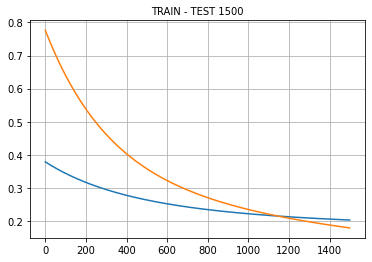

Weights of gradient_descent - training data:  [-0.2556002   0.09844105  0.11929639  0.0184834   0.00045392  0.03284669
  0.07147322 -0.01118999 -0.03151134 -0.01139098  0.00259752  0.03266732
  0.1771239 ] 

Weights of gradient_descent - testing data:  [ 0.54361334  0.08059483  0.11468415  0.00755021  0.00389243  0.12624742
  0.19661429  0.03019765 -0.06687501 -0.01563572  0.04637048 -0.02953669
  0.16397146] 



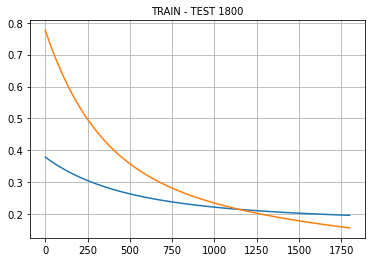

Weights of gradient_descent - training data:  [-0.35133782  0.11878785  0.14250512  0.02008537 -0.03484192  0.01236308
  0.05230195 -0.0500503  -0.06185988 -0.01259966 -0.05520692  0.02192909
  0.31987449] 

Weights of gradient_descent - testing data:  [ 1.14699346 -0.01974731  0.00256683  0.02160024  0.00925198  0.05009907
  0.3182058   0.0100688  -0.06515072 -0.00283677  0.01207513 -0.03614675
 -0.11452534] 



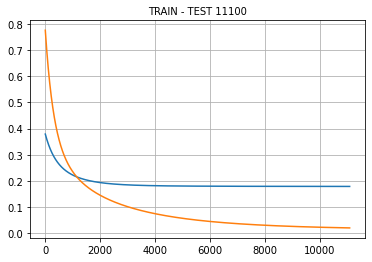

Weights of gradient_descent - training data:  [-0.33094021  0.11540598  0.13683711  0.0230719  -0.03841027  0.0085768
  0.05278348 -0.05074703 -0.0630488  -0.01104875 -0.0614093   0.0214729
  0.36726968] 

Weights of gradient_descent - testing data:  [ 1.40638105e+00 -4.89183626e-03 -6.01845569e-02  1.44477857e-02
  2.01185378e-02  1.95545331e-02  7.43440574e-02 -1.11291498e-02
 -1.95321266e-02  8.11200256e-03 -1.53604116e-03  1.38843654e-04
 -2.10101585e-01] 



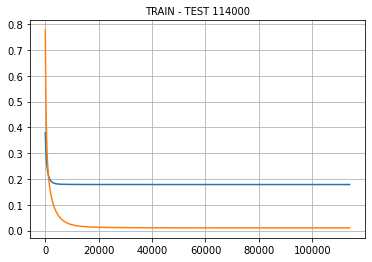

Weights of gradient_descent - training data:  [-0.35024004  0.11912827  0.1420953   0.0203346  -0.03526837  0.01189613
  0.05218201 -0.0502839  -0.06197364 -0.0125902  -0.05590068  0.0218261
  0.32286936] 

Weights of gradient_descent - testing data:  [ 1.16181173 -0.02156844 -0.00214134  0.02217108  0.01098188  0.04746998
  0.31666079  0.00847405 -0.0618007  -0.00209834  0.01188181 -0.03365411
 -0.12191555] 



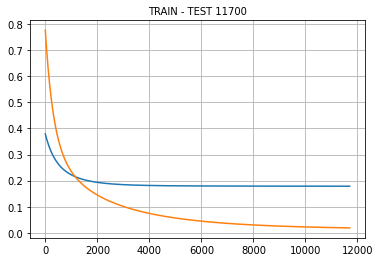

Weights of gradient_descent - training data:  [-0.34969919  0.11927523  0.14189367  0.02045008 -0.03546414  0.01168292
  0.05213682 -0.05038261 -0.06202594 -0.0125839  -0.05621316  0.02177884
  0.32428516] 

Weights of gradient_descent - testing data:  [ 1.16875617 -0.02239341 -0.0043567   0.02239862  0.01181379  0.04625613
  0.31574275  0.00770169 -0.06019448 -0.00174006  0.01179582 -0.03244933
 -0.12534751] 



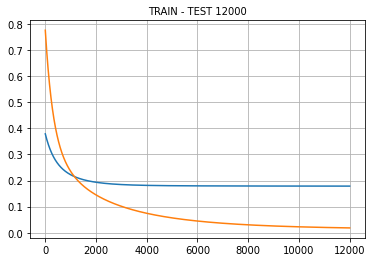

Weights of gradient_descent - training data:  [-0.34916594  0.1194078   0.14169507  0.02055995 -0.03564915  0.01148211
  0.05209986 -0.0504709  -0.06207569 -0.0125765  -0.05650519  0.02173422
  0.32565014] 

Weights of gradient_descent - testing data:  [ 1.17541211 -0.02316581 -0.00648329  0.02259058  0.01262301  0.04510502
  0.31473705  0.00694749 -0.05863464 -0.00138948  0.01171549 -0.03127384
 -0.12861644] 



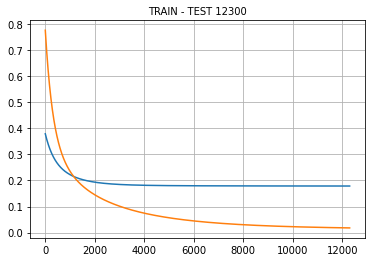

Weights of gradient_descent - training data:  [-0.34864157  0.11952677  0.14149998  0.02066452 -0.03582402  0.01129292
  0.05207009 -0.05054983 -0.06212318 -0.012568   -0.05677841  0.02169212
  0.32696671] 

Weights of gradient_descent - testing data:  [ 1.18179433e+00 -2.38886948e-02 -8.52393344e-03  2.27491764e-02
  1.34092287e-02  4.40134913e-02  3.13650156e-01  6.21227620e-03
 -5.71212535e-02 -1.04682671e-03  1.16399033e-02 -3.01284898e-02
 -1.31730944e-01] 



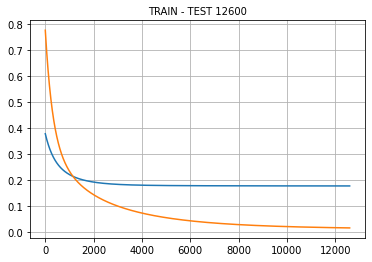

Weights of gradient_descent - training data:  [-0.34812707  0.1196329   0.14130881  0.02076411 -0.03598931  0.01111464
  0.0520466  -0.05062033 -0.06216863 -0.01255839 -0.0570343   0.02165244
  0.32823711] 

Weights of gradient_descent - testing data:  [ 1.18791671e+00 -2.45649313e-02 -1.04814540e-02  2.28766045e-02
  1.41722469e-02  4.29785441e-02  3.12488112e-01  5.49667811e-03
 -5.56541617e-02 -7.12298433e-04  1.15682586e-02 -2.90138744e-02
 -1.34699141e-01] 



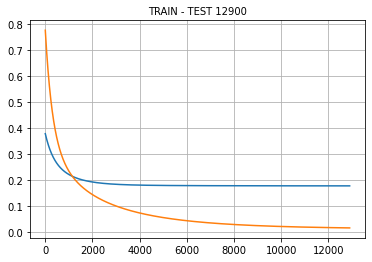

Weights of gradient_descent - training data:  [-0.3476232   0.11972692  0.14112189  0.02085899 -0.03614554  0.0109466
  0.05202858 -0.05068324 -0.06221223 -0.01254771 -0.0572742   0.02161506
  0.32946342] 

Weights of gradient_descent - testing data:  [ 1.19379233e+00 -2.51971737e-02 -1.23586828e-02  2.29749903e-02
  1.49119846e-02  4.19972908e-02  3.11256581e-01  4.80115877e-03
 -5.42330393e-02 -3.86043391e-04  1.14998635e-02 -2.79303713e-02
 -1.37528674e-01] 



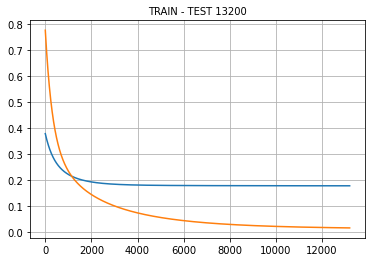

In [185]:
def HGD_ploteo():
    fdata = pd.read_csv('Housing.csv')
    fdata = fdata.replace(to_replace='yes',value=1,regex=True)
    fdata = fdata.replace(to_replace='no',value=0,regex=True)

    data = normalization(fdata)
    data = data.values

    X_train = data[:int((70*len(data))/100), 1:]
    y_train = data[:int((70*len(data))/100), 0]
    X_test = data[int((70*len(data))/100):, 1:]
    y_test = data[int((70*len(data))/100):, 0]
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)

    n_features = X_train.shape[1]
    theta = np.zeros(n_features)

    epochs = [1500,1800,11100,114000,11700,12000,12300,12600,12900,13200]  
    learn_rate = 0.0005

    for epoch in epochs:
        theta_gd, cost_history = gradient_descent(X_train, y_train, theta, epoch, learn_rate)
        theta_gd1, cost_history1 = gradient_descent(X_test, y_test, theta, epoch, learn_rate)
        error_train = calculate_cost(X_train, y_train, theta_gd)
        error_test = calculate_cost(X_test, y_test, theta_gd)
        
        fig, ax = plt.subplots()
        plt.plot(range(len(cost_history)), cost_history)
        plt.plot(range(len(cost_history1)), cost_history1)
        plt.title('TRAIN - TEST '+str(epoch), {'fontsize':10})
        print("Weights of gradient_descent - training data: ", theta_gd, "\n")
        print("Weights of gradient_descent - testing data: ", theta_gd1, "\n")
        ax.grid(True)
        plt.show()
HGD_ploteo()